In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import re
import pandas as pd

In [2]:
page=requests.get("https://www.imdb.com/list/ls023757565/")

In [326]:
page

<Response [200]>

In [327]:
soup=BeautifulSoup(page.text)

In [328]:
hok=soup.find_all("h3",class_="lister-item-header")[1].text
hok

'\n2.\nThe Matrix Reloaded\n(2003)\n'

In [329]:
a=re.sub("[\n\d'.'\n\d+'()']","",hok)

In [330]:
movie=[]
for i in soup.find_all("h3",class_="lister-item-header"):
    a=i.text
    b=re.sub("[\n\d'.'\n\d+'()']","",a)
    movie.append(b)

In [331]:
len(movie)

100

In [332]:
yor=soup.find_all("span",class_="lister-item-year text-muted unbold")

In [333]:
year=[]
for i in soup.find_all("span",class_="lister-item-year text-muted unbold"):
    y=i.text
    year.append(y)
len(year)    

100

In [336]:
yr = []
for i in df["Release_Year"]:
    yr.append(re.sub("[()]","",i))
df["Release_Year"]=yr

In [ ]:
y=[]
for i in df["Release_Year"]:
    i = i.replace("I","")
    y.append(i)
len(y)

In [ ]:
dur=soup.find_all("span",class_="runtime")

In [169]:
duration=[]
for i in soup.find_all("span",class_="runtime"):
    d=i.text
    duration.append(d)
len(duration)

100

In [337]:
dur=[]
for i in df["Duration(In Minutes)"]:
    dur.append(i.replace("min",""))
df["Duration(In Minutes)"] = dur

In [13]:
vis=soup.find_all("span",class_="genre")

In [18]:
genre=[]
for i in soup.find_all("span",class_="genre"):
    g=i.text
    genre.append(g)
len(genre)

100

In [338]:
gen = []
for i in df["Genre"]:
    gen.append(i.replace("\n",""))
df["Genre"] = gen

In [19]:
rating=[]
rat=soup.find_all("span",class_="ipl-rating-star__rating")
for i in rat:
    pro=i.text
    rating.append(pro.split(",")[0].split("(")[0])

In [20]:
Name=[]
for i,char in enumerate(rating):
    if i%23==0:
        Name.append(char)
len(Name)

100

In [21]:
gro=[]
for i in soup.find_all('p', class_='text-muted text-small'):
    a=i.text
    b=a.split('\n')[-2]
    
    gro.append(b)
    #gro.append(a)
    
    #b=a.split('|')[1].split(':')[1].strip().replace('$','').replace('M','')
    #gro.append(b[::2])    
    

In [22]:
#gro

In [23]:
gross=[]
for i,x in enumerate(gro):
    if i%3==2:
        gross.append(x)

In [23]:
len(gross)

100

In [339]:
Grs=[]
for i in df["Collection(In Millions)"]:
    i = i.replace("$","")
    Grs.append(i)
len(Grs)

100

In [342]:
Gr=[]
for i in df["Collection(In Millions)"]:
    i = i.replace("M","")
    Gr.append(i)
len(Gr)

100

In [24]:
vot=[]
for i in soup.find_all('p', class_='text-muted text-small'):
    a=i.text
    b=a.split('\n')[-4]
    
    vot.append(b)
    


In [282]:
votings=[]
for i,x in enumerate(vot):
    if i%3==2:
        votings.append(x)

In [283]:
len(votings)

100

In [29]:
mt=[]
for i in soup.find_all("div",class_="inline-block ratings-metascore"):
    a=i.text.split('\n')[1]
    mot = a.strip()
    mt.append(mot)
len(mt)

99

In [32]:
mt.extend([np.nan])

In [33]:
len(mt)

100

In [343]:
df=pd.DataFrame({'Movie_Name':movie,
     'Release_Year':yr,
     'Duration(In Minutes)':dur,
     'Genre':gen,
     'Ratings':Name,
     'Collection(In Millions)':Gr,
     'Votings':votings,
     'MetaScore':mt
    })

In [344]:
df

,Movie_Name,Release_Year,Duration(In Minutes),Genre,Ratings,Collection(In Millions),Votings,MetaScore
0,The Matrix,1999,109,"Adventure, Drama, Thriller",8.7,7.06,"107,441",80
1,The Matrix Reloaded,2003,110,"Action, Adventure, Thriller",7.2,51.08,"188,485",87
2,The Matrix Revolutions,2003,111,"Horror, Mystery",6.7,4.27,"117,321",62
3,Alien,1979,121,"Action, Biography, Drama",8.5,125.10,"284,124",60
4,Aliens,1986,113,"Drama, Family",8.4,132.42,"161,012",66
...,...,...,...,...,...,...,...,...
95,The Truman Show,1998,107,"Action, Crime, Thriller",8.2,57.74,"62,404",54
96,Guardians of the Galaxy,2014,115,"Action, Crime, Thriller",8,12.63,"71,934",69
97,The Exorcist,1973,106,"Comedy, Family, Fantasy",8.1,32.95,"35,469",51
98,I Am Legend,2007,106,"Crime, Drama, Thriller",7.2,10.72,"151,395",NaN


In [345]:
page2=requests.get("https://www.imdb.com/list/ls023757565/?sort=list_order,asc&st_dt=&mode=detail&page=2")
page2

<Response [200]>

In [177]:
soup=BeautifulSoup(page2.text)

In [178]:
movie=[]
for i in soup.find_all("h3",class_="lister-item-header"):
    a=i.text
    b=re.sub("[\n\d'.'\n\d+'()']","",a)
    movie.append(b)
len(movie)

100

In [179]:
year=[]
for i in soup.find_all("span",class_="lister-item-year text-muted unbold"):
    y=i.text
    year.append(y)
len(year)

100

In [180]:
yr = []
for i in df1["Release_Year"]:
    yr.append(re.sub("[()]","",i))
df1["Release_Year"]=yr

In [181]:
y=[]
for i in df1["Release_Year"]:
    i = i.replace("I","")
    y.append(i)
len(y)

100

In [182]:
duration=[]
for i in soup.find_all("span",class_="runtime"):
    d=i.text
    duration.append(d)
len(duration)

100

In [183]:
dur=[]
for i in df1["Duration(In Minutes)"]:
    dur.append(i.replace("min",""))
df1["Duration(In Minutes)"] = dur

In [184]:
genre=[]
for i in soup.find_all("span",class_="genre"):
    g=i.text
    genre.append(g)
len(genre)

100

In [185]:
gen = []
for i in df1["Genre"]:
    gen.append(i.replace("\n",""))
df1["Genre"] = gen

In [186]:
gro=[]
for i in soup.find_all('p', class_='text-muted text-small'):
    a=i.text
    b=a.split('\n')[-2]
    
    gro.append(b)
    
gross=[]
for i,x in enumerate(gro):
    if i%3==2:
        gross.append(x)
        
len(gross)

100

In [187]:
Grs=[]
for i in df1["Collection(In Millions)"]:
    i = i.replace("$","")
    Grs.append(i)
len(Grs)

100

In [188]:
Gr=[]
for i in df1["Collection(In Millions)"]:
    i = i.replace("M","")
    Gr.append(i)
len(Gr)

100

In [286]:
vot=[]
for i in soup.find_all('p', class_='text-muted text-small'):
    a=i.text
    b=a.split('\n')[-4]
    
    vot.append(b)
    
votings=[]
for i,x in enumerate(vot):
    if i%3==2:
        votings.append(x)
len(votings)

100

In [190]:
mt=[]
for i in soup.find_all("div",class_="inline-block ratings-metascore"):
    a=i.text.split('\n')[1]
    mot = a.strip()
    mt.append(mot)
len(mt)

97

In [191]:
mt.extend([np.nan,np.nan,np.nan])
len(mt)

100

In [192]:
df1=pd.DataFrame({'Movie_Name':movie,
     'Release_Year':y,
     'Duration(In Minutes)':dur,
     'Genre':gen,
     'Ratings':Name,
     'Collection(In Millions)':Gr,
     'Votings':votings,
     'MetaScore':mt
    })

In [193]:
df1

,Movie_Name,Release_Year,Duration(In Minutes),Genre,Ratings,Collection(In Millions),Votings,MetaScore
0,Man of Steel,1980,136,"Biography, Drama, Sport",8.7,171.48,"757,672",55
1,The Thing,2019,138,"Action, Drama, War",7.2,281.49,"412,795",57
2,American Gangster,2003,129,"Biography, Drama, Sport",6.7,139.31,"421,342",76
3,The Banker,2004,117,Drama,8.5,78.90,,59
4,Out of the Furnace,2006,137,"Crime, Drama",8.4,85.16,"115,216",63
...,...,...,...,...,...,...,...,...
95,Home Alone,2021,103,"Action, Crime, Thriller",8.2,125.62,"555,506",55
96,The Fly,2017,121,"Drama, War",8,333.18,"178,258",49
97,Weird Science,2018,122,"Crime, Drama, Thriller",8.1,232.91,"88,007",NaN
98,National Lampoons Vacation,2014,101,"Adventure, Comedy, Drama",7.2,256.39,"107,715",NaN


In [346]:
page3=requests.get("https://www.imdb.com/list/ls023757565/?sort=list_order,asc&st_dt=&mode=detail&page=3")
page3

<Response [200]>

In [347]:
soup=BeautifulSoup(page3.text)

In [348]:
movie=[]
for i in soup.find_all("h3",class_="lister-item-header"):
    a=i.text
    b=re.sub("[\n\d'.'\n\d+'()']","",a)
    movie.append(b)
len(movie)

100

In [350]:
year=[]
for i in soup.find_all("span",class_="lister-item-year text-muted unbold"):
    y=i.text
    year.append(y)
len(year)

100

In [359]:
yr = []
for i in df2["Release_Year"]:
    yr.append(re.sub("[()]","",i))
df2["Release_Year"]=yr

In [199]:
y=[]
for i in df2["Release_Year"]:
    i = i.replace("I","")
    y.append(i)
len(y)

100

In [351]:
duration=[]
for i in soup.find_all("span",class_="runtime"):
    d=i.text
    duration.append(d)
len(duration)

100

In [360]:
dur=[]
for i in df2["Duration(In Minutes)"]:
    dur.append(i.replace("min",""))
df2["Duration"] = dur

In [352]:
genre=[]
for i in soup.find_all("span",class_="genre"):
    g=i.text
    genre.append(g)
len(genre)

100

In [361]:
gen = []
for i in df2["Genre"]:
    gen.append(i.replace("\n",""))
df2["Genre"] = gen

In [353]:
gro=[]
for i in soup.find_all('p', class_='text-muted text-small'):
    a=i.text
    b=a.split('\n')[-2]
    
    gro.append(b)
    
gross=[]
for i,x in enumerate(gro):
    if i%3==2:
        gross.append(x)
        
len(gross)

100

In [362]:
Grs=[]
for i in df2["Collection(In Millions)"]:
    i = i.replace("$","")
    Grs.append(i)
len(Grs)

100

In [365]:
Gr=[]
for i in df2["Collection(In Millions)"]:
    i = i.replace("M","")
    Gr.append(i)
len(Gr)

100

In [354]:
vot=[]
for i in soup.find_all('p', class_='text-muted text-small'):
    a=i.text
    b=a.split('\n')[-4]
    
    vot.append(b)
    
votings=[]
for i,x in enumerate(vot):
    if i%3==2:
        votings.append(x)
len(votings)

100

In [355]:
mt=[]
for i in soup.find_all("div",class_="inline-block ratings-metascore"):
    a=i.text.split('\n')[1]
    mot = a.strip()
    mt.append(mot)
len(mt)

97

In [356]:
mt.extend([np.nan,np.nan,np.nan])
len(mt)

100

In [366]:
df2=pd.DataFrame({'Movie_Name':movie,
     'Release_Year':yr,
     'Duration(In Minutes)':dur,
     'Genre':gen,
     'Ratings':Name,
     'Collection(In Millions)':Gr,
     'Votings':votings,
     'MetaScore':mt
    })

In [367]:
df2

,Movie_Name,Release_Year,Duration(In Minutes),Genre,Ratings,Collection(In Millions),Votings,MetaScore
0,Raging Bull,1980,129,"Biography, Drama, Sport",8.7,23.38,"348,070",89
1,,2019,119,"Action, Drama, War",7.2,159.23,"558,564",78
2,Radio,2003,109,"Biography, Drama, Sport",6.7,52.28,"40,698",38
3,Bullet Boy,2004,89,Drama,8.5,"2,616",,86
4,This Is England,2006,101,"Crime, Drama",8.4,0.33,"121,722",72
...,...,...,...,...,...,...,...,...
95,Wrath of Man,2021,119,"Action, Crime, Thriller",8.2,"166,111",,68
96,Mudbound,2017,134,"Drama, War",8,"48,743",,85
97,The Mule,2018,116,"Crime, Drama, Thriller",8.1,103.80,"134,569",NaN
98,Chef,2014,114,"Adventure, Comedy, Drama",7.2,30.64,"213,390",NaN


In [299]:
page4=requests.get("https://www.imdb.com/list/ls023757565/?sort=list_order,asc&st_dt=&mode=detail&page=4")
page4

<Response [200]>

In [300]:
soup=BeautifulSoup(page4.text)

In [301]:
movie=[]
for i in soup.find_all("h3",class_="lister-item-header"):
    a=i.text
    b=re.sub("[\n\d'.'\n\d+'()']","",a)
    movie.append(b)
len(movie)

100

In [302]:
year=[]
for i in soup.find_all("span",class_="lister-item-year text-muted unbold"):
    y=i.text
    year.append(y)
len(year)

100

In [308]:
yr = []
for i in df3["Release_Year"]:
    yr.append(re.sub("[()]","",i))
df3["Release_Year"]=yr

In [309]:
y=[]
for i in df3["Release_Year"]:
    i = i.replace("I","")
    y.append(i)
len(y)

100

In [310]:
duration=[]
for i in soup.find_all("span",class_="runtime"):
    d=i.text
    duration.append(d)
len(duration)

100

In [311]:
dur=[]
for i in df3["Duration(In Minutes)"]:
    dur.append(i.replace("min",""))
df3["Duration"] = dur

In [312]:
genre=[]
for i in soup.find_all("span",class_="genre"):
    g=i.text
    genre.append(g)
len(genre)

100

In [313]:
gen = []
for i in df3["Genre"]:
    gen.append(i.replace("\n",""))
df3["Genre"] = gen

In [314]:
gro=[]
for i in soup.find_all('p', class_='text-muted text-small'):
    a=i.text
    b=a.split('\n')[-2]
    
    gro.append(b)
    
gross=[]
for i,x in enumerate(gro):
    if i%3==2:
        gross.append(x)
        
len(gross)

100

In [315]:
Grs=[]
for i in df3["Collection(In Millions)"]:
    i = i.replace("$","")
    Grs.append(i)
len(Grs)

100

In [316]:
Gr=[]
for i in df3["Collection(In Millions)"]:
    i = i.replace("M","")
    Gr.append(i)
len(Gr)

100

In [317]:
vot=[]
for i in soup.find_all('p', class_='text-muted text-small'):
    a=i.text
    b=a.split('\n')[-4]
    
    vot.append(b)
    
votings=[]
for i,x in enumerate(vot):
    if i%3==2:
        votings.append(x)
len(votings)

100

In [318]:
mt=[]
for i in soup.find_all("div",class_="inline-block ratings-metascore"):
    a=i.text.split('\n')[1]
    mot = a.strip()
    mt.append(mot)
len(mt)

98

In [319]:
mt.extend([np.nan,np.nan])
len(mt)

100

In [320]:
df3=pd.DataFrame({'Movie_Name':movie,
     'Release_Year':y,
     'Duration(In Minutes)':dur,
     'Genre':gen,
     'Ratings':Name,
     'Collection(In Millions)':Gr,
     'Votings':votings,
     'MetaScore':mt
    })

In [321]:
df3

,Movie_Name,Release_Year,Duration(In Minutes),Genre,Ratings,Collection(In Millions),Votings,MetaScore
0,Deliverance,2015,129,"Biography, Drama, Sport",8.7,23.38,"107,441",80
1,Goldfinger,2015,119,"Action, Drama, War",7.2,159.23,"188,485",87
2,The Omen,2015,109,"Biography, Drama, Sport",6.7,52.28,"117,321",62
3,Lone Survivor,2015,89,Drama,8.5,"2,616","284,124",60
4,WonderI,2015,101,"Crime, Drama",8.4,0.33,"161,012",66
...,...,...,...,...,...,...,...,...
95,Takers,2015,119,"Action, Crime, Thriller",8.2,"166,102","62,404",54
96,Triple,2015,134,"Drama, War",8,"48,743","71,934",69
97,*batteries not included,2015,116,"Crime, Drama, Thriller",8.1,103.80,"35,469",51
98,The Drop,2015,114,"Adventure, Comedy, Drama",7.2,30.64,"151,395",NaN


In [368]:
dfj = pd.concat([df,df1], axis= 0)

dfj.reset_index(drop=True)

,Movie_Name,Release_Year,Duration(In Minutes),Genre,Ratings,Collection(In Millions),Votings,MetaScore
0,The Matrix,1999,109,"Adventure, Drama, Thriller",8.7,7.06,"107,441",80
1,The Matrix Reloaded,2003,110,"Action, Adventure, Thriller",7.2,51.08,"188,485",87
2,The Matrix Revolutions,2003,111,"Horror, Mystery",6.7,4.27,"117,321",62
3,Alien,1979,121,"Action, Biography, Drama",8.5,125.10,"284,124",60
4,Aliens,1986,113,"Drama, Family",8.4,132.42,"161,012",66
...,...,...,...,...,...,...,...,...
195,Home Alone,2021,103,"Action, Crime, Thriller",8.2,125.62,"555,506",55
196,The Fly,2017,121,"Drama, War",8,333.18,"178,258",49
197,Weird Science,2018,122,"Crime, Drama, Thriller",8.1,232.91,"88,007",NaN
198,National Lampoons Vacation,2014,101,"Adventure, Comedy, Drama",7.2,256.39,"107,715",NaN


In [369]:
dfj1 = pd.concat([dfj,df2], axis= 0)

dfj1.reset_index(drop=True)

,Movie_Name,Release_Year,Duration(In Minutes),Genre,Ratings,Collection(In Millions),Votings,MetaScore
0,The Matrix,1999,109,"Adventure, Drama, Thriller",8.7,7.06,"107,441",80
1,The Matrix Reloaded,2003,110,"Action, Adventure, Thriller",7.2,51.08,"188,485",87
2,The Matrix Revolutions,2003,111,"Horror, Mystery",6.7,4.27,"117,321",62
3,Alien,1979,121,"Action, Biography, Drama",8.5,125.10,"284,124",60
4,Aliens,1986,113,"Drama, Family",8.4,132.42,"161,012",66
...,...,...,...,...,...,...,...,...
295,Wrath of Man,2021,119,"Action, Crime, Thriller",8.2,"166,111",,68
296,Mudbound,2017,134,"Drama, War",8,"48,743",,85
297,The Mule,2018,116,"Crime, Drama, Thriller",8.1,103.80,"134,569",NaN
298,Chef,2014,114,"Adventure, Comedy, Drama",7.2,30.64,"213,390",NaN


In [370]:
dfj2 = pd.concat([dfj1,df3], axis= 0)

dfj2.reset_index(drop=True)

,Movie_Name,Release_Year,Duration(In Minutes),Genre,Ratings,Collection(In Millions),Votings,MetaScore
0,The Matrix,1999,109,"Adventure, Drama, Thriller",8.7,7.06,"107,441",80
1,The Matrix Reloaded,2003,110,"Action, Adventure, Thriller",7.2,51.08,"188,485",87
2,The Matrix Revolutions,2003,111,"Horror, Mystery",6.7,4.27,"117,321",62
3,Alien,1979,121,"Action, Biography, Drama",8.5,125.10,"284,124",60
4,Aliens,1986,113,"Drama, Family",8.4,132.42,"161,012",66
...,...,...,...,...,...,...,...,...
395,Takers,2015,119,"Action, Crime, Thriller",8.2,"166,102","62,404",54
396,Triple,2015,134,"Drama, War",8,"48,743","71,934",69
397,*batteries not included,2015,116,"Crime, Drama, Thriller",8.1,103.80,"35,469",51
398,The Drop,2015,114,"Adventure, Comedy, Drama",7.2,30.64,"151,395",NaN


In [371]:
dfj2.describe()

,Movie_Name,Release_Year,Duration(In Minutes),Genre,Ratings,Collection(In Millions),Votings,MetaScore
count,400,400,400,400,400,400,400,390
unique,397,70,82,83,27,302,271,64
top,The Hunger Games: Mockingjay - Part,2015,101,Drama,8.2,39.57,,64
freq,2,101,14,29,44,3,35,19


In [372]:
dfj2.dtypes

Movie_Name                 object
Release_Year               object
Duration(In Minutes)       object
Genre                      object
Ratings                    object
Collection(In Millions)    object
Votings                    object
MetaScore                  object
dtype: object

In [6]:
#dfj2.to_csv('IMDB_Lis_t.csv')

In [5]:
dfi=pd.read_csv("IMDB List.csv")
dfi

,Unnamed: 0,Movie_Name,Release_Year,Duration(In Minutes),Genre,Ratings,Collection(In Millions),Votings,MetaScore
0,0,The Matrix,1980,129,"Biography, Drama, Sport",8.7,171.48,"348,069",89.0
1,1,The Matrix Reloaded,2019,119,"Action, Drama, War",7.2,281.49,"558,558",78.0
2,2,The Matrix Revolutions,2003,109,"Biography, Drama, Sport",6.7,139.31,"40,698",38.0
3,3,Alien,2004,89,Drama,8.5,78.9,0,86.0
4,4,Aliens,2006,101,"Crime, Drama",8.4,85.16,"121,722",72.0
...,...,...,...,...,...,...,...,...,...
395,395,Takers,2021,119,"Action, Crime, Thriller",8.2,"166,102","62,404",54.0
396,396,Triple,2017,134,"Drama, War",8.0,"48,743","71,934",69.0
397,397,*batteries not included,2018,116,"Crime, Drama, Thriller",8.1,103.8,"35,469",51.0
398,398,The Drop,2014,114,"Adventure, Comedy, Drama",7.2,30.64,"151,395",0.0


In [374]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Movie_Name               398 non-null    object 
 1   Release_Year             400 non-null    int64  
 2   Duration(In Minutes)     400 non-null    int64  
 3   Genre                    400 non-null    object 
 4   Ratings                  400 non-null    float64
 5   Collection(In Millions)  400 non-null    object 
 6   Votings                  359 non-null    object 
 7   MetaScore                389 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 25.1+ KB


In [389]:
#dfi['MetaScore'].fillna(dfi['MetaScore'].mean(),inplace=True)

In [390]:
import math
dfi['MetaScore'].fillna(math.floor(dfi['MetaScore'].mean()))

0      89.000000
1      78.000000
2      38.000000
3      86.000000
4      72.000000
         ...    
395    54.000000
396    69.000000
397    51.000000
398    66.868895
399    66.868895
Name: MetaScore, Length: 400, dtype: float64

In [391]:
dfi

,Movie_Name,Release_Year,Duration(In Minutes),Genre,Ratings,Collection(In Millions),Votings,MetaScore
0,The Matrix,1980,129,"Biography, Drama, Sport",8.7,171.48,"348,069",89.000000
1,The Matrix Reloaded,2019,119,"Action, Drama, War",7.2,281.49,"558,558",78.000000
2,The Matrix Revolutions,2003,109,"Biography, Drama, Sport",6.7,139.31,"40,698",38.000000
3,Alien,2004,89,Drama,8.5,78.9,NaN,86.000000
4,Aliens,2006,101,"Crime, Drama",8.4,85.16,"121,722",72.000000
...,...,...,...,...,...,...,...,...
395,Takers,2021,119,"Action, Crime, Thriller",8.2,"166,102","62,404",54.000000
396,Triple,2017,134,"Drama, War",8.0,"48,743","71,934",69.000000
397,*batteries not included,2018,116,"Crime, Drama, Thriller",8.1,103.8,"35,469",51.000000
398,The Drop,2014,114,"Adventure, Comedy, Drama",7.2,30.64,"151,395",66.868895


In [393]:
#fi['Votings'].fillna(dfi['Votings'].mean())

In [394]:
#import math
#dfi['Votings'].fillna(math.floor(dfi['Votings'].mode()))

In [395]:
dfi

,Movie_Name,Release_Year,Duration(In Minutes),Genre,Ratings,Collection(In Millions),Votings,MetaScore
0,The Matrix,1980,129,"Biography, Drama, Sport",8.7,171.48,"348,069",89.000000
1,The Matrix Reloaded,2019,119,"Action, Drama, War",7.2,281.49,"558,558",78.000000
2,The Matrix Revolutions,2003,109,"Biography, Drama, Sport",6.7,139.31,"40,698",38.000000
3,Alien,2004,89,Drama,8.5,78.9,NaN,86.000000
4,Aliens,2006,101,"Crime, Drama",8.4,85.16,"121,722",72.000000
...,...,...,...,...,...,...,...,...
395,Takers,2021,119,"Action, Crime, Thriller",8.2,"166,102","62,404",54.000000
396,Triple,2017,134,"Drama, War",8.0,"48,743","71,934",69.000000
397,*batteries not included,2018,116,"Crime, Drama, Thriller",8.1,103.8,"35,469",51.000000
398,The Drop,2014,114,"Adventure, Comedy, Drama",7.2,30.64,"151,395",66.868895


In [401]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Movie_Name               398 non-null    object 
 1   Release_Year             400 non-null    int64  
 2   Duration(In Minutes)     400 non-null    int64  
 3   Genre                    400 non-null    object 
 4   Ratings                  400 non-null    float64
 5   Collection(In Millions)  377 non-null    float64
 6   Votings                  0 non-null      float64
 7   MetaScore                400 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 25.1+ KB


In [403]:
dfi

,Movie_Name,Release_Year,Duration(In Minutes),Genre,Ratings,Collection(In Millions),Votings,MetaScore
0,The Matrix,1980,129,"Biography, Drama, Sport",8.7,171.48,NaN,89.000000
1,The Matrix Reloaded,2019,119,"Action, Drama, War",7.2,281.49,NaN,78.000000
2,The Matrix Revolutions,2003,109,"Biography, Drama, Sport",6.7,139.31,NaN,38.000000
3,Alien,2004,89,Drama,8.5,78.90,NaN,86.000000
4,Aliens,2006,101,"Crime, Drama",8.4,85.16,NaN,72.000000
...,...,...,...,...,...,...,...,...
395,Takers,2021,119,"Action, Crime, Thriller",8.2,NaN,NaN,54.000000
396,Triple,2017,134,"Drama, War",8.0,NaN,NaN,69.000000
397,*batteries not included,2018,116,"Crime, Drama, Thriller",8.1,103.80,NaN,51.000000
398,The Drop,2014,114,"Adventure, Comedy, Drama",7.2,30.64,NaN,66.868895


In [399]:
dfi['Collection(In Millions)']=pd.to_numeric(dfi['Collection(In Millions)'],errors='coerce')
dfi['Collection(In Millions)'].dtypes

dtype('float64')

In [7]:
df = pd.read_csv("IMDB_List_Edited1.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Movie_Name               398 non-null    object 
 1   Release_Year             400 non-null    int64  
 2   Duration(In Minutes)     400 non-null    int64  
 3   Genre                    400 non-null    object 
 4   Ratings                  400 non-null    float64
 5   Collection(In Millions)  400 non-null    object 
 6   Votings                  359 non-null    object 
 7   MetaScore                389 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 25.1+ KB


In [9]:
df["MetaScore"]=df["MetaScore"].fillna(0)

In [10]:
df["Votings"]=df["Votings"].fillna(0)

In [11]:
df

,Movie_Name,Release_Year,Duration(In Minutes),Genre,Ratings,Collection(In Millions),Votings,MetaScore
0,The Matrix,1980,129,"Biography, Drama, Sport",8.7,171.48,"348,069",89.0
1,The Matrix Reloaded,2019,119,"Action, Drama, War",7.2,281.49,"558,558",78.0
2,The Matrix Revolutions,2003,109,"Biography, Drama, Sport",6.7,139.31,"40,698",38.0
3,Alien,2004,89,Drama,8.5,78.9,0,86.0
4,Aliens,2006,101,"Crime, Drama",8.4,85.16,"121,722",72.0
...,...,...,...,...,...,...,...,...
395,Takers,2021,119,"Action, Crime, Thriller",8.2,"166,102","62,404",54.0
396,Triple,2017,134,"Drama, War",8.0,"48,743","71,934",69.0
397,*batteries not included,2018,116,"Crime, Drama, Thriller",8.1,103.8,"35,469",51.0
398,The Drop,2014,114,"Adventure, Comedy, Drama",7.2,30.64,"151,395",0.0


In [12]:
df[df["Movie_Name"].isnull()]

,Movie_Name,Release_Year,Duration(In Minutes),Genre,Ratings,Collection(In Millions),Votings,MetaScore
59,NaN,2008,114,"Action, Crime, Thriller",7.6,210.61,"249,882",60.0
201,NaN,2019,119,"Action, Drama, War",7.2,281.49,"558,564",78.0


In [13]:
df.iloc[59,0] = "300"

In [14]:
df.to_csv("IMDB List.csv")

In [2]:
df = pd.read_csv("IMDB_List.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'IMDB_List.csv'

In [9]:
df

,Unnamed: 0,Movie_Name,Release_Year,Duration(In Minutes),Genre,Ratings,Collection(In Millions),Votings,MetaScore
0,0,The Matrix,1980,129,"Biography, Drama, Sport",8.7,171.48,"348,069",89.0
1,1,The Matrix Reloaded,2019,119,"Action, Drama, War",7.2,281.49,"558,558",78.0
2,2,The Matrix Revolutions,2003,109,"Biography, Drama, Sport",6.7,139.31,"40,698",38.0
3,3,Alien,2004,89,Drama,8.5,78.9,0,86.0
4,4,Aliens,2006,101,"Crime, Drama",8.4,85.16,"121,722",72.0
...,...,...,...,...,...,...,...,...,...
395,395,Takers,2021,119,"Action, Crime, Thriller",8.2,"166,102","62,404",54.0
396,396,Triple,2017,134,"Drama, War",8.0,"48,743","71,934",69.0
397,397,*batteries not included,2018,116,"Crime, Drama, Thriller",8.1,103.8,"35,469",51.0
398,398,The Drop,2014,114,"Adventure, Comedy, Drama",7.2,30.64,"151,395",0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               400 non-null    int64  
 1   Movie_Name               400 non-null    object 
 2   Release_Year             400 non-null    int64  
 3   Duration(In Minutes)     400 non-null    int64  
 4   Genre                    400 non-null    object 
 5   Ratings                  400 non-null    float64
 6   Collection(In Millions)  400 non-null    object 
 7   Votings                  400 non-null    object 
 8   MetaScore                400 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 28.2+ KB


In [12]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [19]:
df

,Movie_Name,Release_Year,Duration(In Minutes),Genre,Ratings,Collection(In Millions),Votings,MetaScore
0,The Matrix,1980,129,"Biography, Drama, Sport",8.7,171.48,"348,069",89.0
1,The Matrix Reloaded,2019,119,"Action, Drama, War",7.2,281.49,"558,558",78.0
2,The Matrix Revolutions,2003,109,"Biography, Drama, Sport",6.7,139.31,"40,698",38.0
3,Alien,2004,89,Drama,8.5,78.9,0,86.0
4,Aliens,2006,101,"Crime, Drama",8.4,85.16,"121,722",72.0
...,...,...,...,...,...,...,...,...
395,Takers,2021,119,"Action, Crime, Thriller",8.2,"166,102","62,404",54.0
396,Triple,2017,134,"Drama, War",8.0,"48,743","71,934",69.0
397,*batteries not included,2018,116,"Crime, Drama, Thriller",8.1,103.8,"35,469",51.0
398,The Drop,2014,114,"Adventure, Comedy, Drama",7.2,30.64,"151,395",0.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Movie_Name               400 non-null    object 
 1   Release_Year             400 non-null    int64  
 2   Duration(In Minutes)     400 non-null    int64  
 3   Genre                    400 non-null    object 
 4   Ratings                  400 non-null    float64
 5   Collection(In Millions)  400 non-null    object 
 6   Votings                  400 non-null    object 
 7   MetaScore                400 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 25.1+ KB


In [20]:
df["Ratings"].unique()

array([8.7, 7.2, 6.7, 8.5, 8.4, 6.4, 7. , 8.3, 8.8, 7.6, 7.4, 9. , 8.1,
       8.6, 7.9, 7.8, 7.3, 7.1, 8.2, 7.7, 9.2, 6.2, 7.5, 6.8, 6.3, 8. ,
       8.9])

In [ ]:
df[df["Ratings"]

In [430]:
df["Release_Year"] = df["Release_Year"].astype(int)

In [434]:
df["Votings"] = df["Votings"].astype(int)

In [431]:
b = []
for i in df["Votings"]:
    a = re.sub(",","",i)
    b.append(a)

In [433]:
df["Votings"] = b

In [436]:
df['Votings'].fillna(df['Votings'].mean())

0      348069
1      558558
2       40698
3           0
4      121722
        ...  
395     62404
396     71934
397     35469
398    151395
399    248313
Name: Votings, Length: 400, dtype: int32

In [29]:
df["Release_Year"].value_counts()

2019    32
2017    28
1990    28
1997    24
2000    16
2015    16
2014    16
1984    16
2006    12
2008    12
2018    12
2004    12
1978    12
1982    12
1999    12
2013     8
2012     8
1989     8
1992     8
1987     8
2020     8
1998     4
2010     4
2002     4
1956     4
1967     4
1939     4
1954     4
2011     4
1993     4
1980     4
1963     4
1985     4
1979     4
1976     4
1973     4
1991     4
1983     4
1986     4
1988     4
2005     4
2016     4
2003     4
2021     4
Name: Release_Year, dtype: int64

## EDA 

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### HeatMap

In [14]:
num_df=df.select_dtypes(include=['number'])
num_df.corr()

,Release_Year,Duration(In Minutes),Ratings,MetaScore
Release_Year,1.000000,0.111235,-0.202170,-0.045277
Duration(In Minutes),0.111235,1.000000,0.056632,0.150863
Ratings,-0.202170,0.056632,1.000000,0.117973
MetaScore,-0.045277,0.150863,0.117973,1.000000


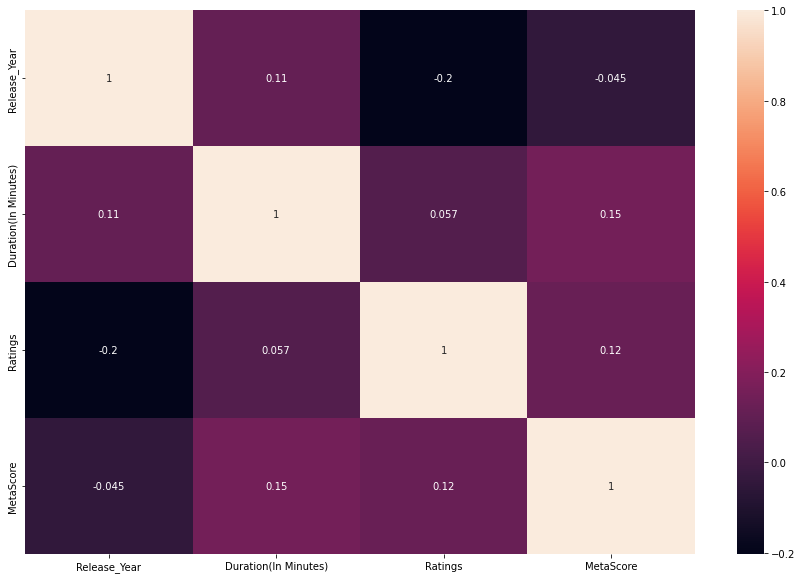

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(num_df.corr(),annot=True)
plt.show()

<AxesSubplot:>

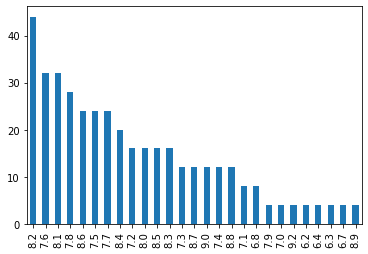

In [16]:
df['Ratings'].value_counts().plot.bar()

<AxesSubplot:>

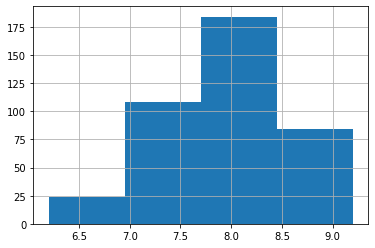

In [19]:
df["Ratings"].hist(bins=4)

<AxesSubplot:xlabel='Ratings', ylabel='count'>

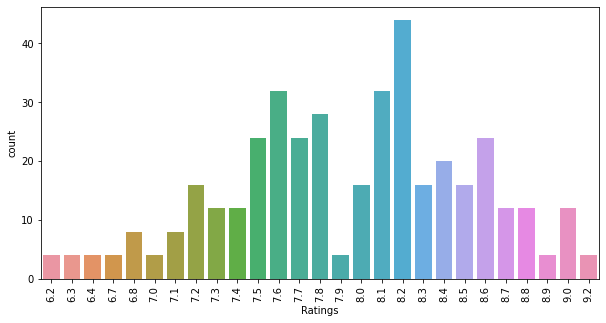

In [17]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
sns.countplot(x='Ratings',data=df)

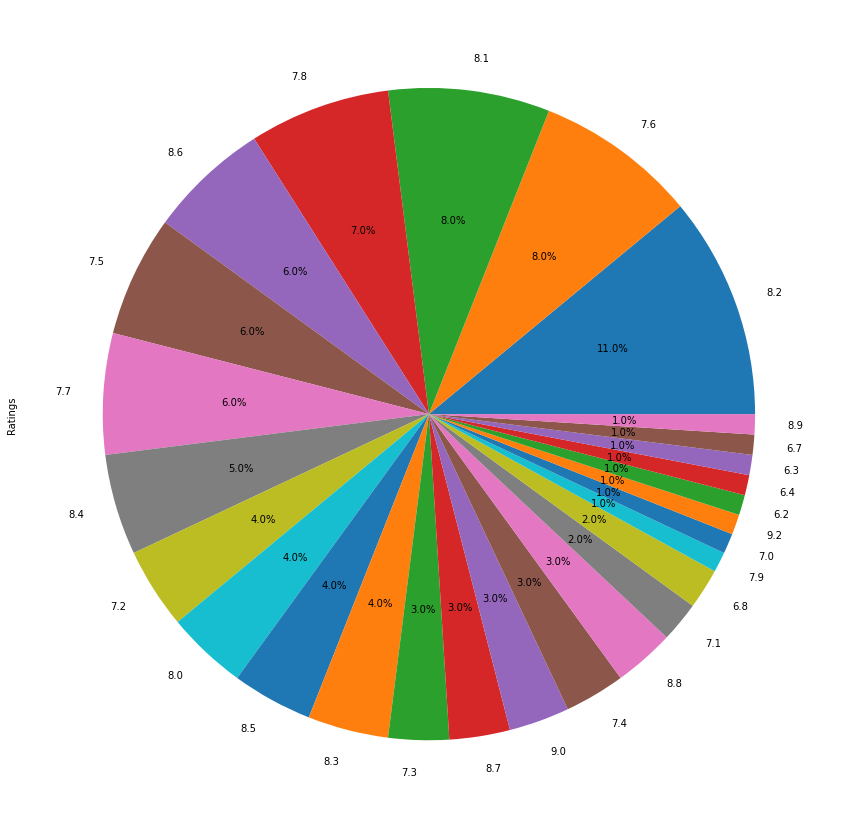

In [18]:
plt.figure(figsize=(20,15))
df["Ratings"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

<AxesSubplot:>

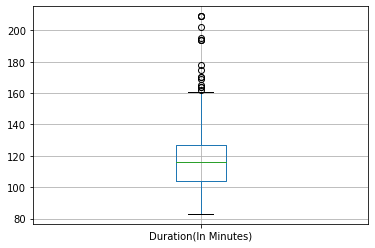

In [19]:
df.boxplot(column="Duration(In Minutes)")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration(In Minutes)'>

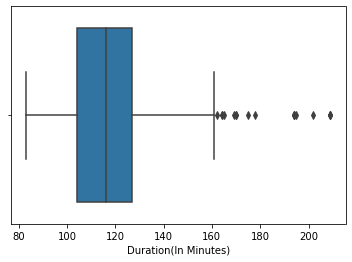

In [20]:
sns.boxplot(df["Duration(In Minutes)"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration(In Minutes)'>

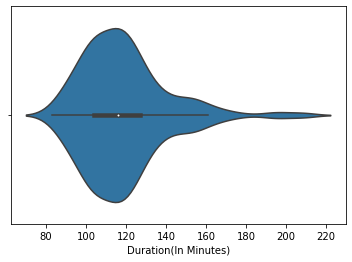

In [21]:
sns.violinplot(df["Duration(In Minutes)"])

# num vs num

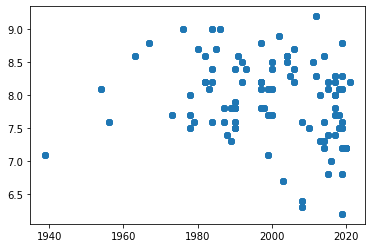

In [22]:
plt.scatter(df["Release_Year"],df["Ratings"])

In [23]:
df["Release_Year"].corr(df["Ratings"])

-0.20216961880118134

<AxesSubplot:xlabel='Release_Year', ylabel='Ratings'>

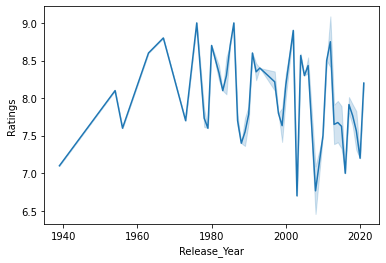

In [24]:
sns.lineplot(x="Release_Year",y="Ratings",data=df)

# cate vs num

<AxesSubplot:xlabel='Genre', ylabel='Ratings'>

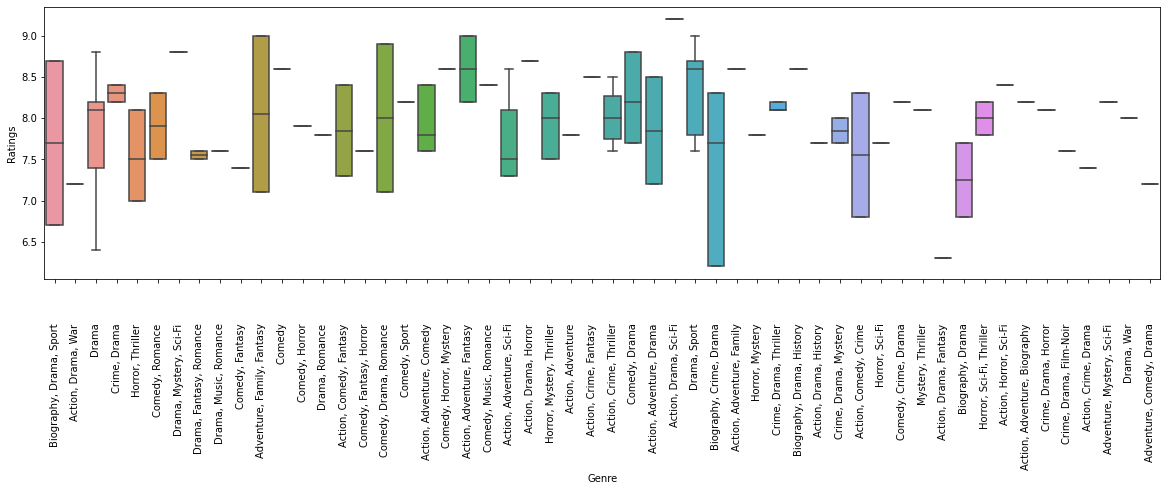

In [25]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.boxplot(x="Genre",y="Ratings",data=df)

In [26]:
df.head(1)

,Movie_Name,Release_Year,Duration(In Minutes),Genre,Ratings,Collection(In Millions),Votings,MetaScore
0,The Matrix,1980,129,"Biography, Drama, Sport",8.7,171.48,"348,069",89.0


<AxesSubplot:xlabel='Genre', ylabel='Ratings'>

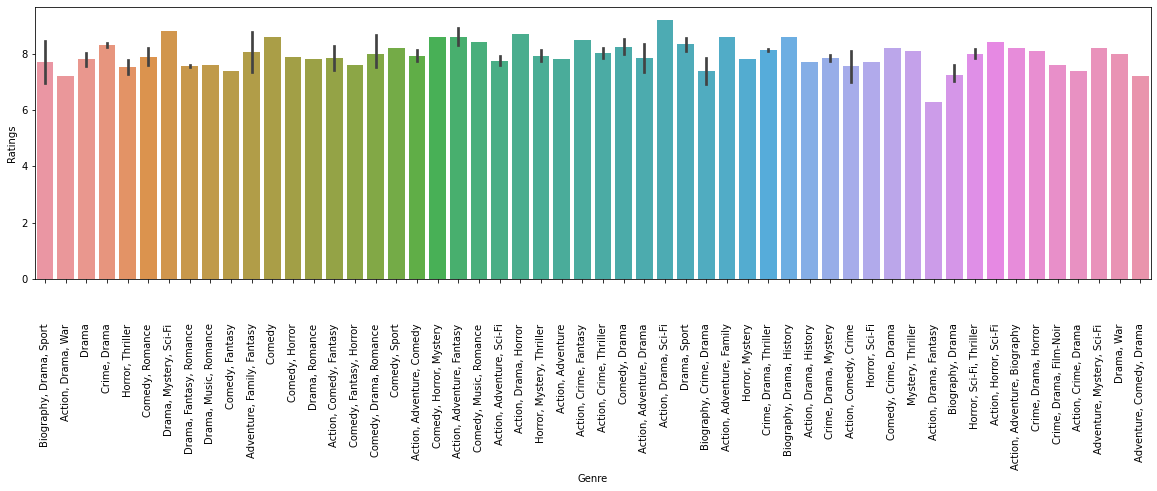

In [17]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x="Genre",y="Ratings",data=df)

In [14]:
fig = px.bar(df["Ratings"],color=df["Genre"])
fig.update_xaxes(categoryorder="sum descending")